In [1]:
pip install xgboost


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load the dataset
df = pd.read_csv("merged_patient_features_with_PWV.csv")

# Drop rows with missing values
df = df.dropna()

# Define features and target
target = 'Age'
X = df.drop(columns=['patient_id', 'Age', 'Gender'])  # drop non-numeric or identifier columns
y = df[target]


In [20]:
selected_features = ['PWV', 'HR_mean', 'RR_mean', 'RI_mean', 'AI_mean', 'AJ_mean']
X = df[selected_features]

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [24]:
# Predict on test data
y_pred = xgb_model.predict(X_test)

# Evaluate
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 11.759523391723633
R² Score: -0.16388803960454124


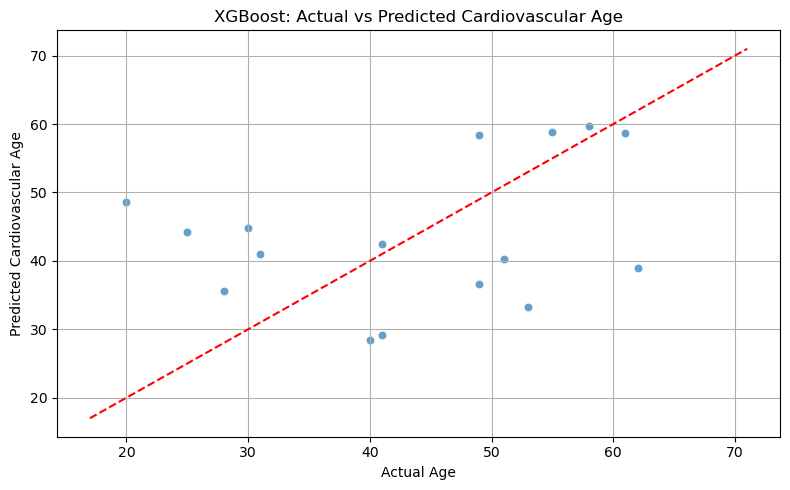

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Age")
plt.ylabel("Predicted Cardiovascular Age")
plt.title("XGBoost: Actual vs Predicted Cardiovascular Age")
plt.grid(True)
plt.tight_layout()
plt.show()


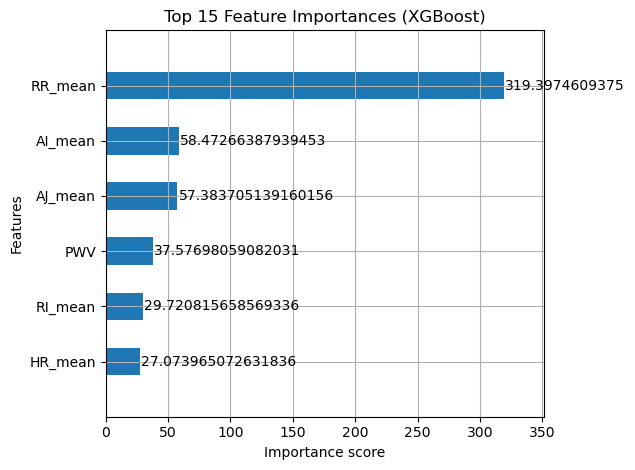

In [28]:
xgb.plot_importance(xgb_model, importance_type='gain', max_num_features=15, height=0.5)
plt.title("Top 15 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()
